In [1]:
import numpy as np
import matplotlib.pyplot as plt                              # For plotting data
import seaborn as sns                                        # For plotting data
import pandas as pd                                          # For dataframes
from sklearn.model_selection import GridSearchCV             # For parameter optimization
from sklearn.tree import DecisionTreeClassifier, plot_tree   # For decision trees

In [2]:
#reading the file
df = pd.read_csv('blood_pressure_prediction.csv')

In [3]:
#We check the data using the first few rows
df.head()

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke


In [4]:
df.tail()

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
14995,13981,Keya Iyer,88,Female,1,1,Divorced,Self-employed,Urban,160.22,...,Social Drinker,High,0,No,Paleo,1.12,171/92,"HDL: 44, LDL: 153",NaN,No Stroke
14996,87707,Anahita Virk,47,Female,0,0,Married,Private,Urban,107.58,...,Never,Low,1,No,Gluten-Free,1.47,155/71,"HDL: 35, LDL: 183",Difficulty Speaking,No Stroke
14997,33174,Ivana Kaur,35,Male,0,0,Married,Government Job,Rural,134.90,...,Rarely,High,1,No,Paleo,0.51,121/110,"HDL: 57, LDL: 159","Difficulty Speaking, Severe Fatigue, Headache",Stroke
14998,22343,Anvi Mannan,73,Male,0,0,Single,Self-employed,Urban,169.42,...,Never,High,0,Yes,Paleo,1.53,157/74,"HDL: 79, LDL: 91","Severe Fatigue, Numbness, Confusion, Dizziness...",No Stroke
14999,11066,Gokul Trivedi,64,Female,0,0,Single,Never Worked,Urban,186.88,...,Rarely,Moderate,0,No,Vegan,4.57,133/81,"HDL: 78, LDL: 179",Headache,Stroke


In [5]:
#Basic statistical information about the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Patient ID,15000.0,49715.802867,29000.656642,1.00,24562.0000,49448.00,75112.0000,99975.0
Age,15000.0,54.035667,21.063111,18.00,36.0000,54.00,72.0000,90.0
Hypertension,15000.0,0.249000,0.432448,0.00,0.0000,0.00,0.0000,1.0
Heart Disease,15000.0,0.502933,0.500008,0.00,0.0000,1.00,1.0000,1.0
Average Glucose Level,15000.0,129.445209,40.487792,60.00,94.5175,128.90,164.5925,200.0
Body Mass Index (BMI),15000.0,27.474302,7.230201,15.01,21.1600,27.42,33.7200,40.0
Stroke History,15000.0,0.500267,0.500017,0.00,0.0000,1.00,1.0000,1.0
Stress Levels,15000.0,5.022694,2.873223,0.00,2.5400,5.05,7.5200,10.0


In [6]:
#The rows and columns of the dataset
df.shape

(15000, 22)

In [7]:
#From the info, there are no null in the tables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                15000 non-null  int64  
 1   Patient Name              15000 non-null  object 
 2   Age                       15000 non-null  int64  
 3   Gender                    15000 non-null  object 
 4   Hypertension              15000 non-null  int64  
 5   Heart Disease             15000 non-null  int64  
 6   Marital Status            15000 non-null  object 
 7   Work Type                 15000 non-null  object 
 8   Residence Type            15000 non-null  object 
 9   Average Glucose Level     15000 non-null  float64
 10  Body Mass Index (BMI)     15000 non-null  float64
 11  Smoking Status            15000 non-null  object 
 12  Alcohol Intake            15000 non-null  object 
 13  Physical Activity         15000 non-null  object 
 14  Stroke

In [8]:
#Checking for null values. Only 'Symptoms' column has null values
df.isnull().sum()

Patient ID                     0
Patient Name                   0
Age                            0
Gender                         0
Hypertension                   0
Heart Disease                  0
Marital Status                 0
Work Type                      0
Residence Type                 0
Average Glucose Level          0
Body Mass Index (BMI)          0
Smoking Status                 0
Alcohol Intake                 0
Physical Activity              0
Stroke History                 0
Family History of Stroke       0
Dietary Habits                 0
Stress Levels                  0
Blood Pressure Levels          0
Cholesterol Levels             0
Symptoms                    2500
Diagnosis                      0
dtype: int64

In [9]:
# Counts for some selected columns
df[["Gender", "Smoking Status", "Marital Status", "Work Type", "Smoking Status",
    "Alcohol Intake", "Physical Activity"]].apply(pd.Series.value_counts)

,Gender,Smoking Status,Marital Status,Work Type,Smoking Status,Alcohol Intake,Physical Activity
Currently Smokes,NaN,5011.0,NaN,NaN,5011.0,NaN,NaN
Divorced,NaN,NaN,4980.0,NaN,NaN,NaN,NaN
Female,7378.0,NaN,NaN,NaN,NaN,NaN,NaN
Formerly Smoked,NaN,4980.0,NaN,NaN,4980.0,NaN,NaN
Frequent Drinker,NaN,NaN,NaN,NaN,NaN,3705.0,NaN
Government Job,NaN,NaN,NaN,3710.0,NaN,NaN,NaN
High,NaN,NaN,NaN,NaN,NaN,NaN,5060.0
Low,NaN,NaN,NaN,NaN,NaN,NaN,4942.0
Male,7622.0,NaN,NaN,NaN,NaN,NaN,NaN
Married,NaN,NaN,4864.0,NaN,NaN,NaN,NaN


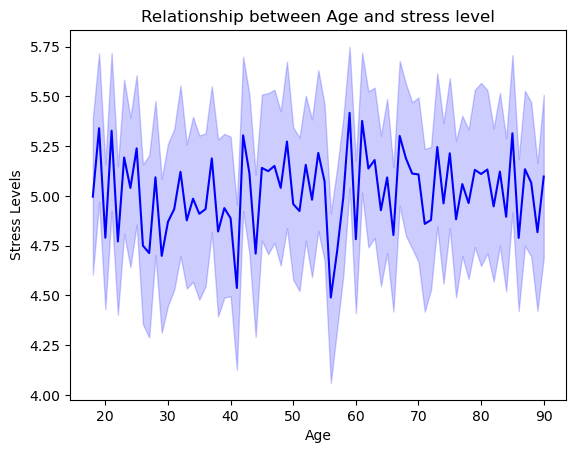

In [10]:
# Create a line plot for the Relationship between Age and stress level
sns.lineplot(x='Age', y='Stress Levels', data=df, color='blue')

plt.xlabel('Age')
plt.ylabel('Stress Levels')
plt.title('Relationship between Age and stress level')
plt.show()

<Axes: xlabel='Stress Levels', ylabel='Count'>

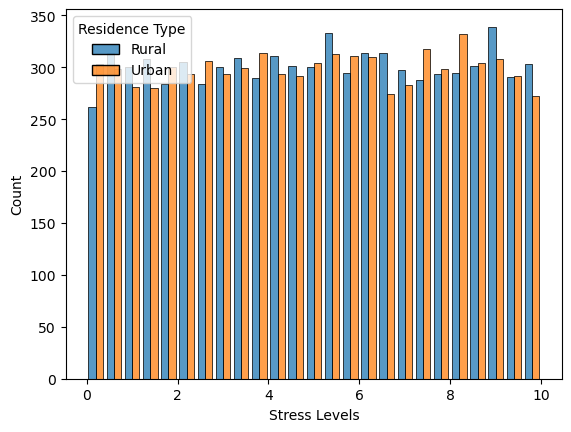

In [11]:
sns.histplot(data=df, x="Stress Levels", hue="Residence Type", multiple="dodge", shrink=.8)

In [12]:
#The blood pressure level is in Systolic/Diastolic. Each one needs to be separated into different columns 
df[['Systolic', 'Diastolic']] = df['Blood Pressure Levels'].str.extract(r'(\d+)/(\d+)')
df['Systolic'] = pd.to_numeric(df['Systolic'])
df['Diastolic'] = pd.to_numeric(df['Diastolic'])


In [13]:
# Create a new column 'BP_Status' based on the conditions
df['BP_Status'] = 'High BP'

# Conditions for 'Normal BP'
condition_female = (df['Age'] <= 39) & (df['Systolic'] <= 110) & (df['Diastolic'] <= 68) & (df['Gender'] == 'Female')
condition_male = (df['Age'] <= 39) & (df['Systolic'] <= 119) & (df['Diastolic'] <= 70) & (df['Gender'] == 'Male')
df.loc[condition_female | condition_male, 'BP_Status'] = 'Normal BP'

condition_female = (40 <= df['Age']) & (df['Age'] <= 59) & (df['Systolic'] <= 122) & (df['Diastolic'] <= 74) & (df['Gender'] == 'Female')
condition_male = (40 <= df['Age']) & (df['Age'] <= 59) & (df['Systolic'] <= 124) & (df['Diastolic'] <= 77) & (df['Gender'] == 'Male')
df.loc[condition_female | condition_male, 'BP_Status'] = 'Normal BP'

condition_female = (df['Age'] > 59) & (df['Systolic'] <= 139) & (df['Diastolic'] <= 68) & (df['Gender'] == 'Female')
condition_male = (df['Age'] > 59) & (df['Systolic'] <= 133) & (df['Diastolic'] <= 69) & (df['Gender'] == 'Male')
df.loc[condition_female | condition_male, 'BP_Status'] = 'Normal BP'

df.head()

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis,Systolic,Diastolic,BP_Status
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke,140,108,High BP
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke,146,91,High BP
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke,154,97,High BP
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke,174,81,High BP
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke,121,95,High BP


In [14]:
#Counts for some selected columns
df[["BP_Status"]].value_counts()

BP_Status
High BP      13617
Normal BP     1383
dtype: int64

In [15]:
#Checking family history and high BP. Indicator to show that other factors affect stroke apart from family history
pd.crosstab(df["Family History of Stroke"],df["BP_Status"])


BP_Status,High BP,Normal BP
Family History of Stroke,,
No,6692,716
Yes,6925,667


In [16]:
#Relationship between location and BP status. Location is not so much of a factor to having a BP
pd.crosstab(df["Residence Type"],df["BP_Status"])

BP_Status,High BP,Normal BP
Residence Type,,
Rural,6824,705
Urban,6793,678


In [17]:
pd.crosstab(df["Heart Disease"],df["BP_Status"])

BP_Status,High BP,Normal BP
Heart Disease,,
0,6758,698
1,6859,685


In [18]:
pd.crosstab(df["Heart Disease"],df["Diagnosis"])

Diagnosis,No Stroke,Stroke
Heart Disease,,
0,3751,3705
1,3781,3763


In [19]:
#This better shows that older people are prone to high BP than younger people
# Create a new column for age group
df['Age_Group'] = df['Age'].apply(lambda x: 'less than or equal to 40' if x <= 40 else 'greater than 40')

# Perform a crosstab between Age_Group and BP_Status
pd.crosstab(df['Age_Group'], df['BP_Status'])

BP_Status,High BP,Normal BP
Age_Group,,
greater than 40,9179,1109
less than or equal to 40,4438,274


In [20]:
#relationship between BP status and diagnosis. The people with normal BP and still had stroke is open for studies
pd.crosstab(df['BP_Status'], df['Diagnosis'])

Diagnosis,No Stroke,Stroke
BP_Status,,
High BP,6845,6772
Normal BP,687,696


In [21]:
#Separating HDL from LDL for easy analysis
df[['HDL', 'LDL']]=df['Cholesterol Levels'].str.extract(r'HDL: (\d+), LDL: (\d+)')
df['HDL'] = pd.to_numeric(df['HDL'])
df['LDL'] = pd.to_numeric(df['LDL'])

<Axes: xlabel='Diagnosis', ylabel='Age'>

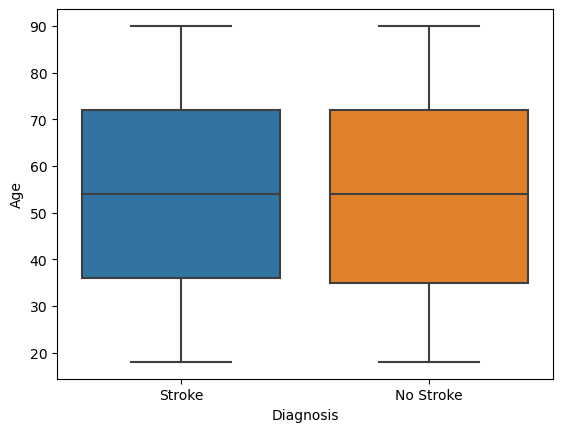

In [22]:
sns.boxplot(x=df['Diagnosis'],y=df["Age"])

In [23]:
#replacing Diagnosis and BP_Status with numbers
df['Diagnosis']= df['Diagnosis'].replace(['No Stroke','Stroke'],[0,1])
df['BP_Status']= df['BP_Status'].replace(['Normal BP','High BP'],[0,1])
df.head()

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis,Systolic,Diastolic,BP_Status,Age_Group,HDL,LDL
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",1,140,108,1,greater than 40,68,133
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",1,146,91,1,greater than 40,63,70
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",1,154,97,1,less than or equal to 40,59,95
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",0,174,81,1,greater than 40,70,137
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,1,121,95,1,greater than 40,65,68


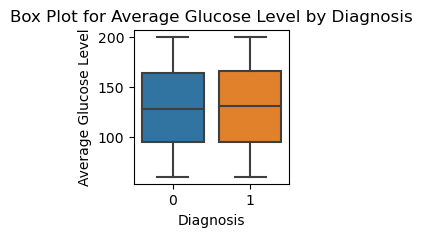

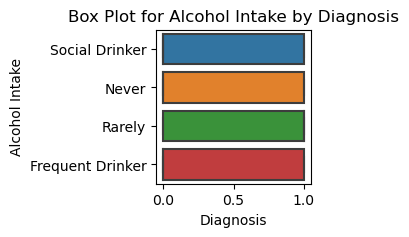

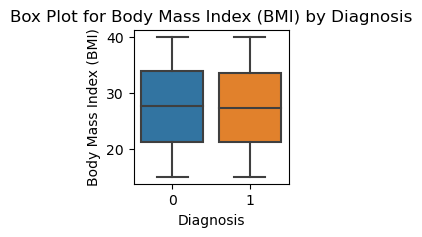

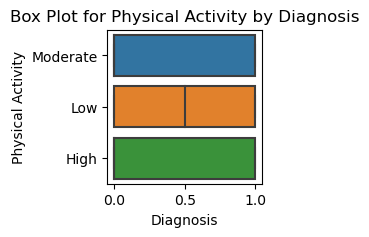

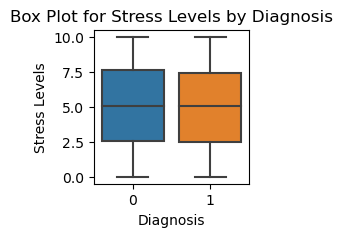

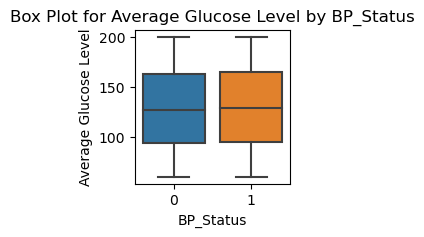

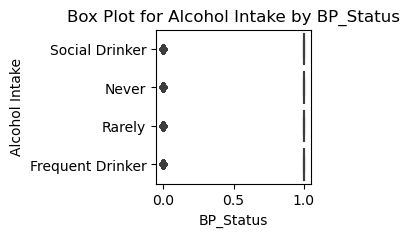

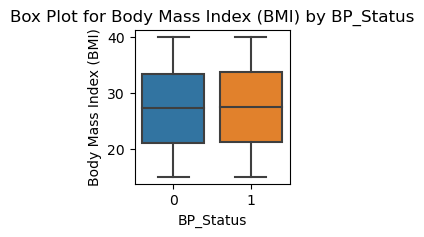

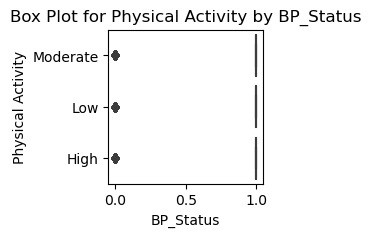

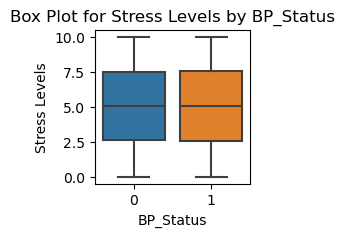

In [24]:

num_col = ['Average Glucose Level', 'Alcohol Intake', 'Body Mass Index (BMI)', 'Physical Activity', 'Stress Levels']
col_plot = ['Diagnosis', 'BP_Status']

for num_plot in col_plot:
    for col in num_col:
        plt.figure(figsize=(2, 2))  
        sns.boxplot(x=df[num_plot], y=df[col])
        plt.title(f'Box Plot for {col} by {num_plot}')
        plt.show()



In [25]:
#Dropping some columns
df.drop(columns=['Patient ID','Patient Name','Blood Pressure Levels','Cholesterol Levels','Symptoms'],index=1,inplace=True)



In [26]:
df.head(3)

,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,...,Family History of Stroke,Dietary Habits,Stress Levels,Diagnosis,Systolic,Diastolic,BP_Status,Age_Group,HDL,LDL
0,56,Male,0,1,Married,Self-employed,Rural,130.91,22.37,Non-smoker,...,Yes,Vegan,3.48,1,140,108,1,greater than 40,68,133
2,26,Male,1,1,Married,Never Worked,Rural,189.00,20.32,Formerly Smoked,...,Yes,Paleo,7.31,1,154,97,1,less than or equal to 40,59,95
3,73,Male,0,0,Married,Never Worked,Urban,185.29,27.50,Non-smoker,...,No,Paleo,5.35,0,174,81,1,greater than 40,70,137


In [27]:
#Separating the columns into numerical and categorical columns

col_num=[col for col in df.columns if df[col].dtype!='O']
col_cat=[col for col in df.columns if df[col].dtype=='O']
print(f'The numerical columns are :{col_num}')
print(f'The categorical columns are :{col_cat}')

The numerical columns are :['Age', 'Hypertension', 'Heart Disease', 'Average Glucose Level', 'Body Mass Index (BMI)', 'Stroke History', 'Stress Levels', 'Diagnosis', 'Systolic', 'Diastolic', 'BP_Status', 'HDL', 'LDL']
The categorical columns are :['Gender', 'Marital Status', 'Work Type', 'Residence Type', 'Smoking Status', 'Alcohol Intake', 'Physical Activity', 'Family History of Stroke', 'Dietary Habits', 'Age_Group']


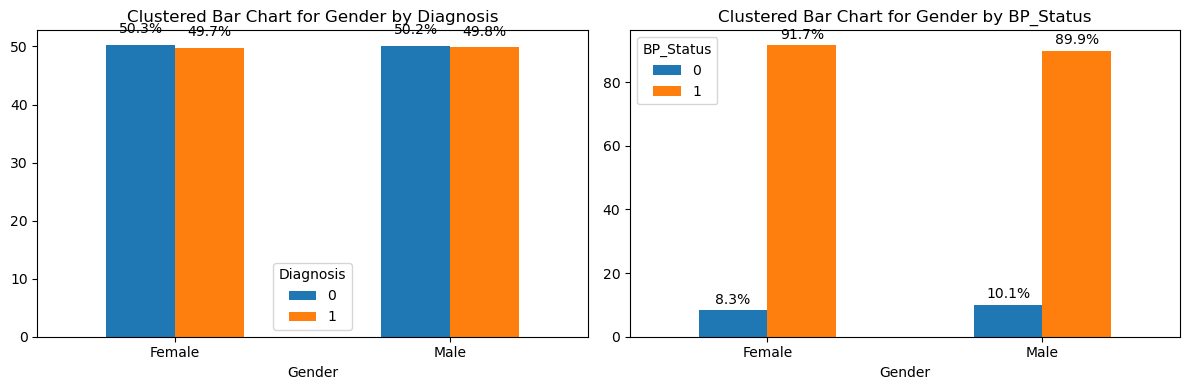

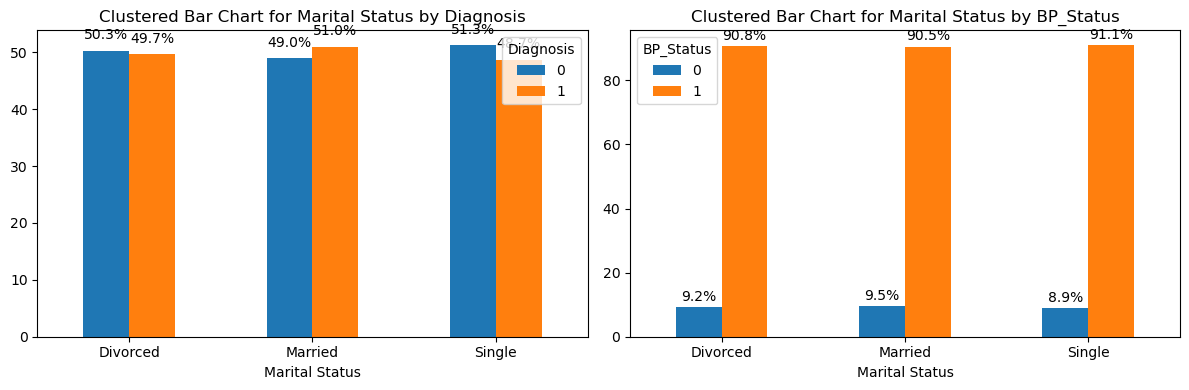

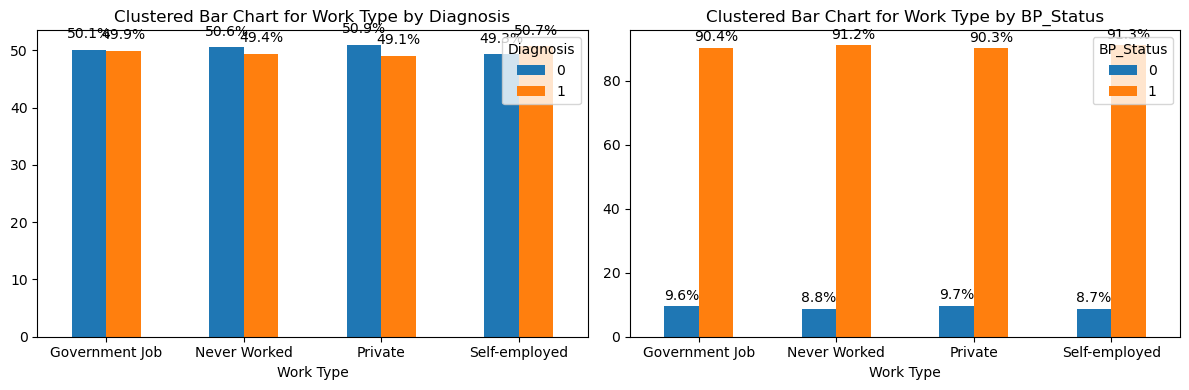

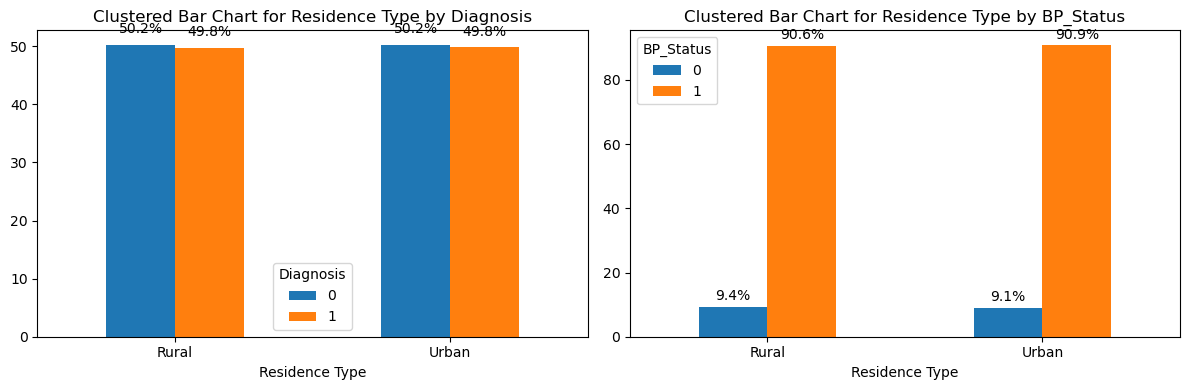

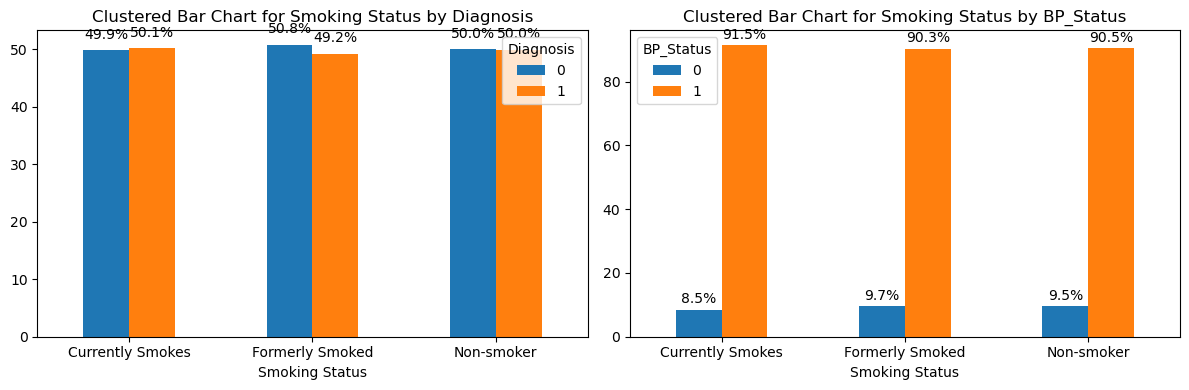

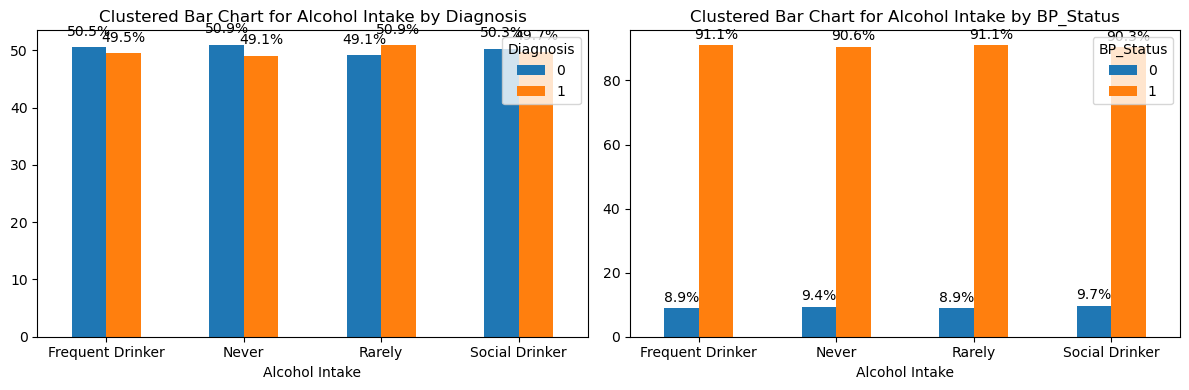

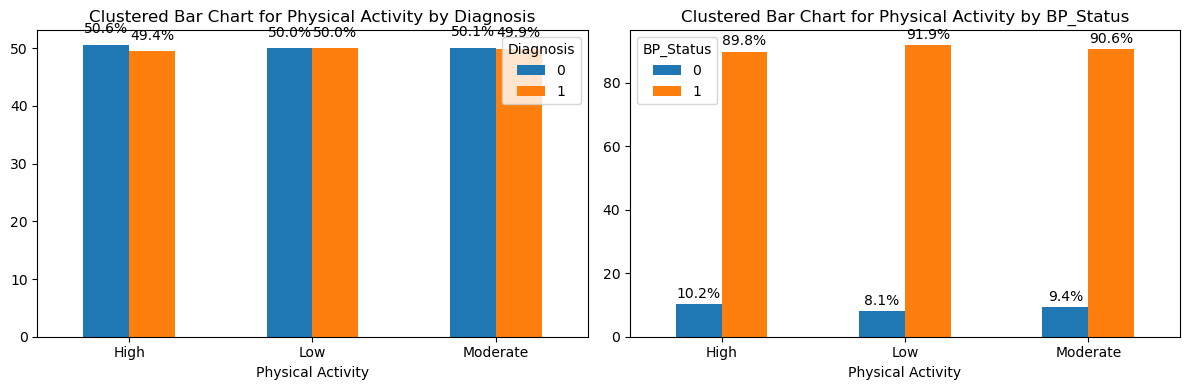

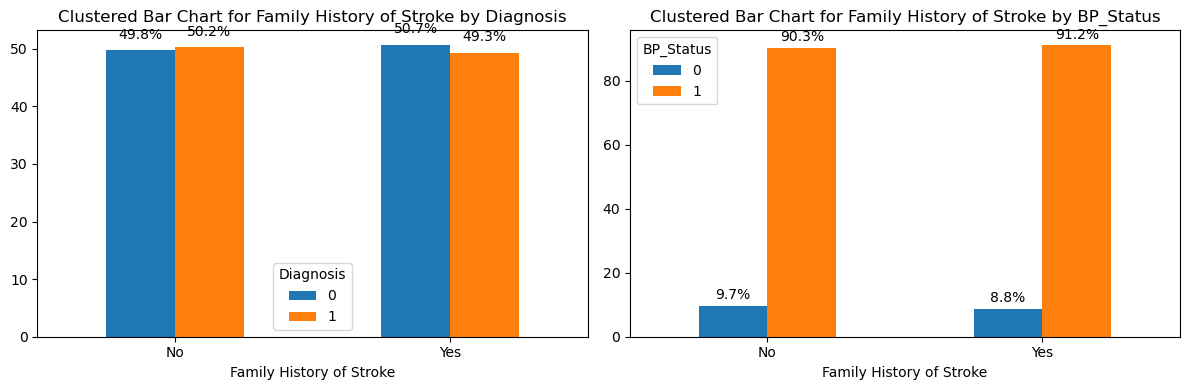

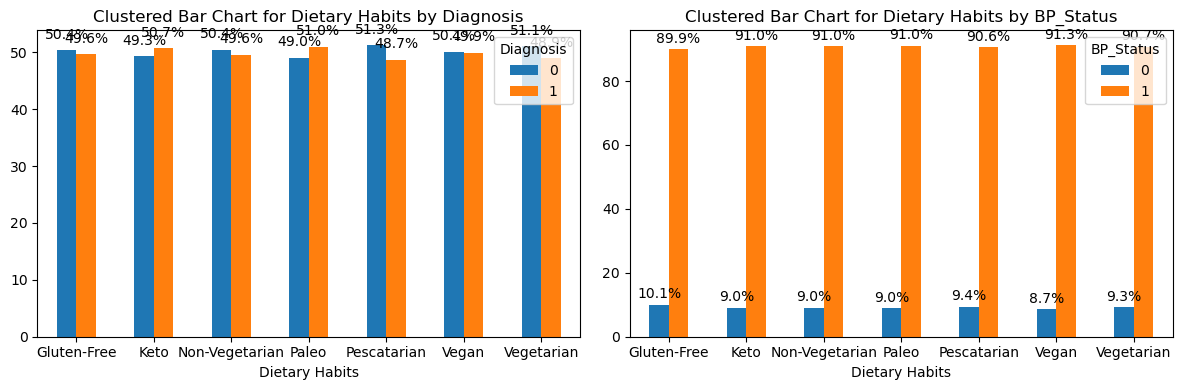

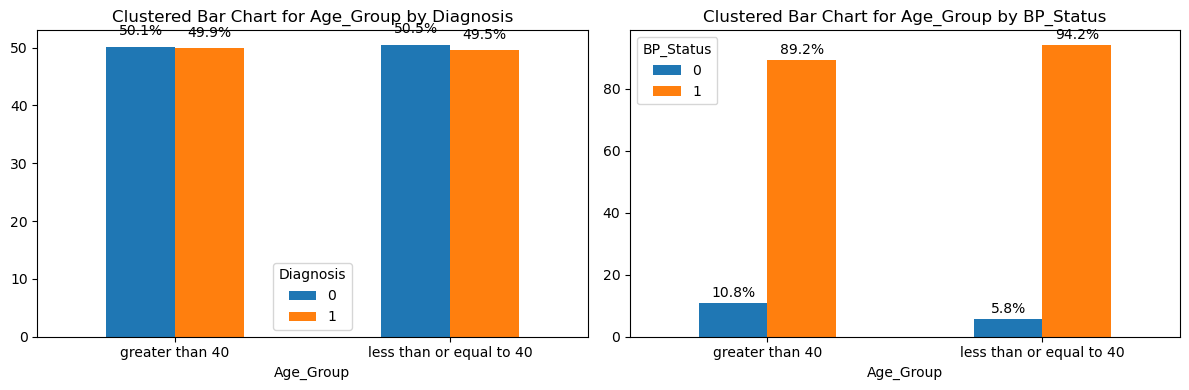

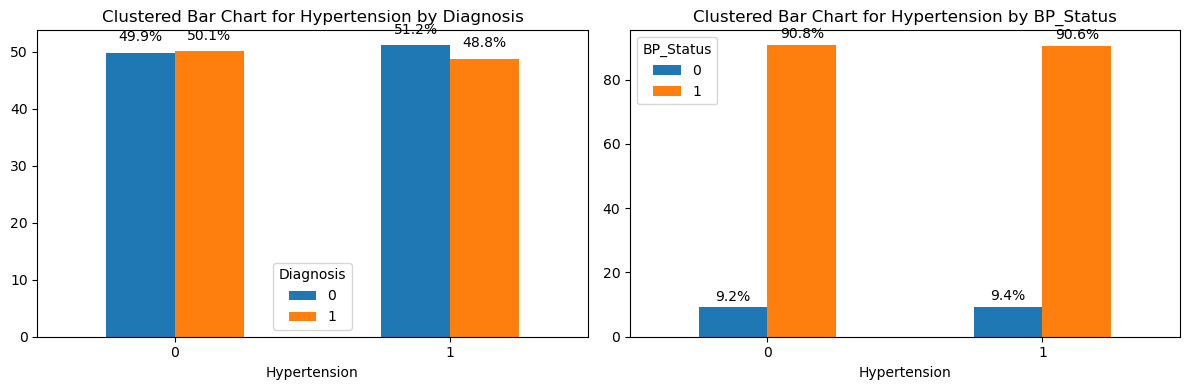

In [28]:
for col in col_cat + ['Hypertension']:
    ct = pd.crosstab(df[col], df['Diagnosis'], normalize='index') * 100  # Calculate percentages
    ct_bp = pd.crosstab(df[col], df['BP_Status'], normalize='index') * 100  # Calculate percentages
    
    plt.figure(figsize=(12, 4)) 
    
    # Create the first subplot for 'Diagnosis'
    plt.subplot(1, 2, 1)
    ax = ct.plot(kind='bar', ax=plt.gca())
    
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.1f}%', (x + width/2, y + height + 2), ha='center')
    
    plt.xticks(rotation=0)
    plt.title(f'Clustered Bar Chart for {col} by Diagnosis')
    plt.xlabel(col)
    
    # Create the second subplot for 'BP_Status'
    plt.subplot(1, 2, 2)
    ax_bp = ct_bp.plot(kind='bar', ax=plt.gca())
    
    for p in ax_bp.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax_bp.annotate(f'{height:.1f}%', (x + width/2, y + height + 2), ha='center')
    
    plt.xticks(rotation=0)
    plt.title(f'Clustered Bar Chart for {col} by BP_Status')
    plt.xlabel(col)
    
    # Adjust layout and show the subplots
    plt.tight_layout()
    plt.show()


In [29]:
num_df = df[col_num]
num_df.head()


,Age,Hypertension,Heart Disease,Average Glucose Level,Body Mass Index (BMI),Stroke History,Stress Levels,Diagnosis,Systolic,Diastolic,BP_Status,HDL,LDL
0,56,0,1,130.91,22.37,0,3.48,1,140,108,1,68,133
2,26,1,1,189.00,20.32,0,7.31,1,154,97,1,59,95
3,73,0,0,185.29,27.50,0,5.35,0,174,81,1,70,137
4,51,1,1,177.34,29.06,0,6.84,1,121,95,1,65,68
5,62,0,0,91.60,37.47,0,4.85,1,132,64,0,80,69


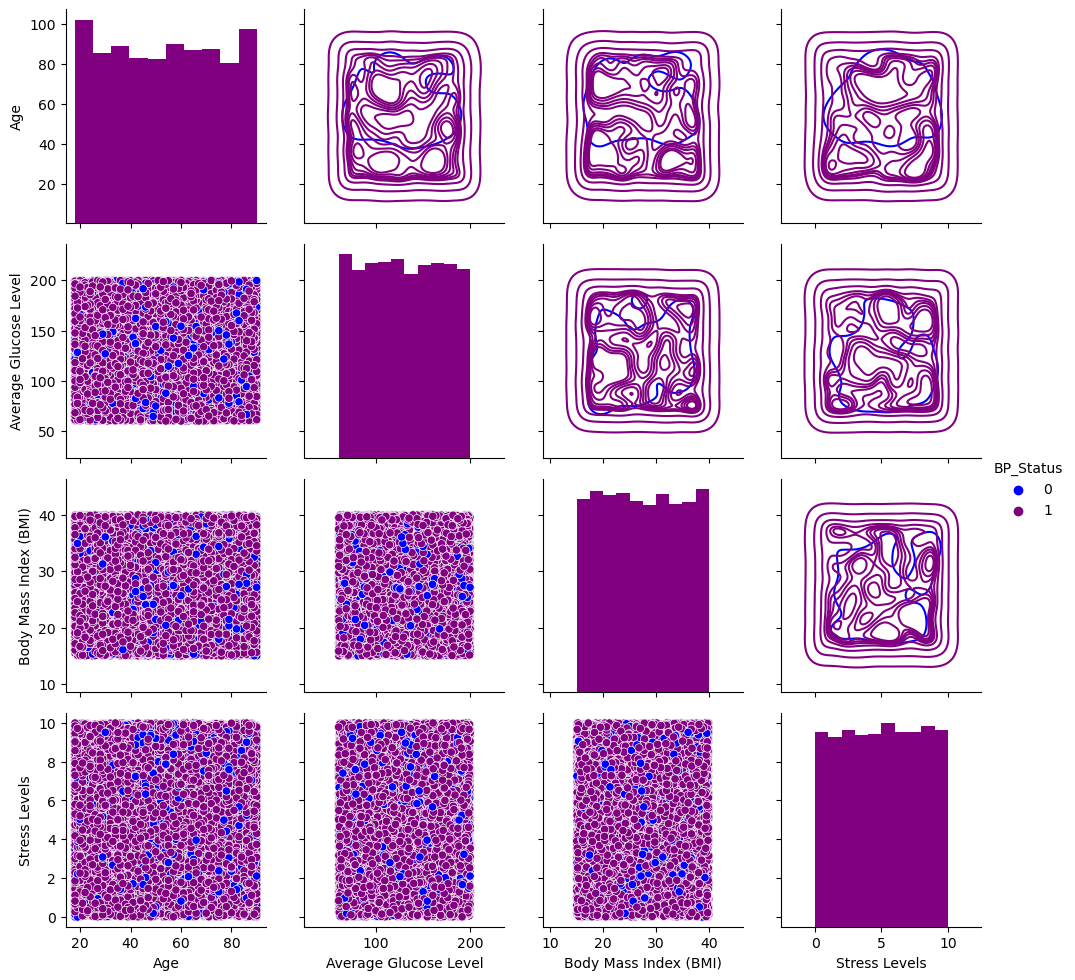

In [30]:
# Creates a grid using Seaborn's PairGrid()
g = sns.PairGrid(
    num_df, 
    vars=['Age', 'Average Glucose Level', 'Body Mass Index (BMI)', 'Stress Levels'], 
    hue='BP_Status', 
    diag_sharey=False, 
    palette=['blue', 'purple'])

# Adds histograms on the diagonal
g.map_diag(plt.hist)

# Adds density plots above the diagonal
g.map_upper(sns.kdeplot)

# Adds scatterplots below the diagonal
g.map_lower(sns.scatterplot)

# Adds a legend
g.add_legend(title='BP_Status')

##### Feature Selection

In [31]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [32]:
# encode categorical columns
cols_to_encode = col_cat

for col in cols_to_encode:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])

df.head(5)

,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,...,Family History of Stroke,Dietary Habits,Stress Levels,Diagnosis,Systolic,Diastolic,BP_Status,Age_Group,HDL,LDL
0,56,1,0,1,1,3,0,130.91,22.37,2,...,1,5,3.48,1,140,108,1,0,68,133
2,26,1,1,1,1,1,0,189.00,20.32,1,...,1,3,7.31,1,154,97,1,1,59,95
3,73,1,0,0,1,1,1,185.29,27.50,2,...,0,3,5.35,0,174,81,1,0,70,137
4,51,1,1,1,0,3,1,177.34,29.06,0,...,1,4,6.84,1,121,95,1,0,65,68
5,62,0,0,0,2,2,1,91.60,37.47,0,...,0,0,4.85,1,132,64,0,0,80,69


In [33]:
from sklearn.feature_selection import SelectKBest, f_classif

In [34]:
X = df.drop('BP_Status', axis = 1)
y = df.BP_Status

In [35]:
# select best features for predicting BP status
sel = SelectKBest(f_classif, k = 10)
fea_sel = sel.fit(X, y)

In [36]:
fea_sel

SelectKBest()

In [37]:
mask = fea_sel.get_support()
names = sel.feature_names_in_[mask]
scores = sel.scores_[mask]

In [38]:
sorted_data = sorted(zip(scores, names), reverse=False)
sorted_scores, sorted_names = zip(*sorted_data)

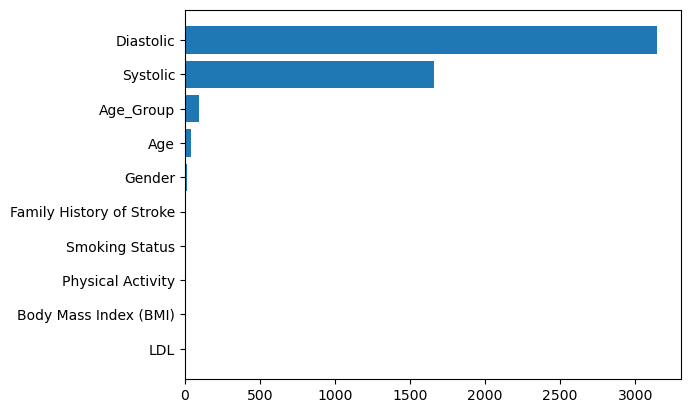

In [39]:
plt.barh(sorted_names, sorted_scores)
plt.show()

In [40]:
X = df[names]
y = df.BP_Status

In [41]:
X.head(3)

,Age,Gender,Body Mass Index (BMI),Smoking Status,Physical Activity,Family History of Stroke,Systolic,Diastolic,Age_Group,LDL
0,56,1,22.37,2,2,1,140,108,0,133
2,26,1,20.32,1,0,1,154,97,1,95
3,73,1,27.50,2,2,0,174,81,0,137


In [42]:
feature_names = X.columns.tolist()

In [43]:
feature_names

['Age',
 'Gender',
 'Body Mass Index (BMI)',
 'Smoking Status',
 'Physical Activity',
 'Family History of Stroke',
 'Systolic',
 'Diastolic',
 'Age_Group',
 'LDL']

In [44]:
#Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0, stratify = y)

In [45]:
#standardizing the train and test dataset.
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_s=sc.fit_transform(X_train)
X_test_s=sc.transform(X_test)

In [46]:
#Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

# Fits the decision tree to training data
classifier.fit(X_train_s, y_train)


DecisionTreeClassifier()

In [47]:
#Calculate Mean Accuracy on Training Data
print(
    'Accuracy on training data: ' 
    + str("{:.3%}".format(classifier.score(X_train_s, y_train))))

Accuracy on training data: 100.000%


In [48]:
#Evaluating the model
#Predicting the Test set results
y_pred=classifier.predict(X_test_s)
print(y_pred)

[0 1 1 ... 1 1 1]


In [49]:
np.unique(y_pred)

array([0, 1], dtype=int64)

In [50]:
print(y_test)

11534    0
9378     1
4831     1
13979    1
11261    1
        ..
7590     1
8596     1
1905     1
5973     1
4204     1
Name: BP_Status, Length: 4500, dtype: int64


In [51]:
# Defines a DecisionTreeClassifier object
classifier = DecisionTreeClassifier(
    random_state=1) 

# Possible values for max_leaf_nodes to try
param = range(6,45,2)

# Sets up GridSearchCV object and stores it in grid variable
grid = GridSearchCV(
    classifier,
    {'max_leaf_nodes': param, 
     'criterion': ['entropy','gini']})

# Fits the grid to the training data 
grid.fit(X_train_s,y_train)

# Stores the optimum model in best_dt
best_classifier = grid.best_estimator_

# Displays the optimum model
best_classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 36,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

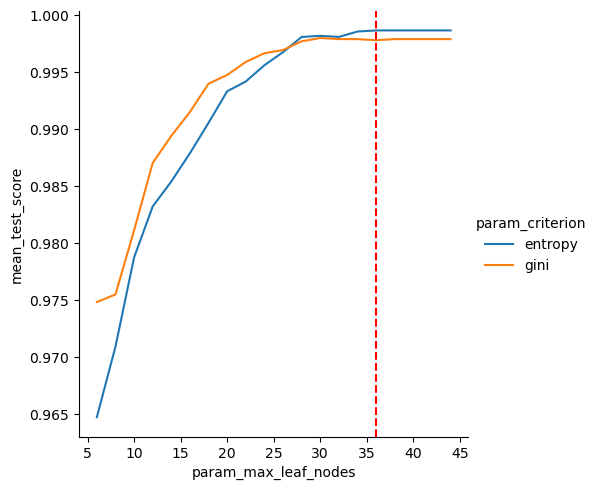

In [52]:
# Plots the mean accuracy against max_leaf_nodes
sns.relplot(
    data=pd.DataFrame.from_dict(grid.cv_results_, orient='columns'),
    kind='line',
    x='param_max_leaf_nodes', 
    y='mean_test_score', 
    hue='param_criterion'
)

# Draws a vertical red line, where the best model is
plt.axvline(
    x=best_classifier.max_leaf_nodes, 
    color='red', 
    ls='--')

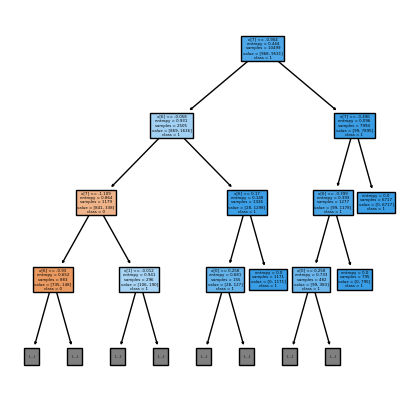

In [53]:
# Class labels
bp_nature = ['0','1']
# Sets the figure size
fig = plt.figure(figsize=(5, 5))

# Creates a visual display of the model.
# Keep max_depth small for better visualization 
t = plot_tree(
    best_classifier,
    class_names= bp_nature,
    max_depth=3,
    filled=True)

In [54]:
#Calculate Mean Accuracy on Testing Data
print(
    'Accuracy on testing data: ' 
    + str("{:.2%}".format(best_classifier.score(X_test_s, y_test))))

Accuracy on testing data: 99.84%


In [55]:
y_pred=best_classifier.predict(X_test_s)

In [56]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test, y_pred)
print('accuracy:%.4f\n\n'%(acc))
cm=metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matix:')
print(cm, '\n\n')
print ('--------------------------------------------')
result=metrics.classification_report(y_test,y_pred)
print('Classification Report:\n')
print(result)

accuracy:0.9984


Confusion Matix:
[[ 412    3]
 [   4 4081]] 


--------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       415
           1       1.00      1.00      1.00      4085

    accuracy                           1.00      4500
   macro avg       0.99      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500



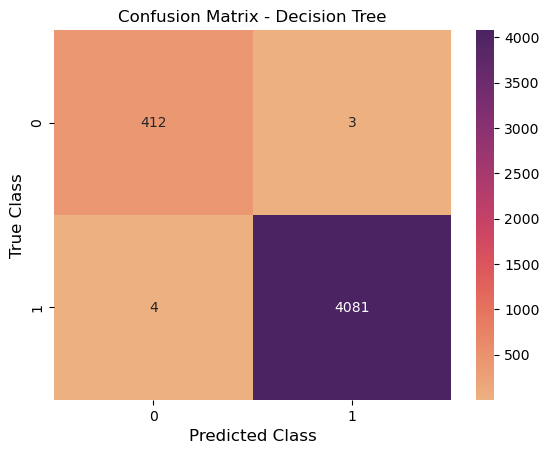

In [57]:

#use the seaborn heatmap to visualise the confusion matrix
ax = sns.heatmap(cm, cmap = 'flare', annot = True, fmt ='d')

plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.title("Confusion Matrix - Decision Tree", fontsize=12)

plt.show()


##### Using KNN

In [58]:
# Training the model
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=13, metric='minkowski', p=2)
classifier.fit(X_train_s, y_train)

KNeighborsClassifier(n_neighbors=13)

In [59]:
# Sets up the kNN classifier object
knn = KNeighborsClassifier() 

# Search parameters
param = range(3, 15, 2)

# Sets up GridSearchCV object and stores it in grid variable
grid = GridSearchCV(
    knn,
    {'n_neighbors': param})

# Fits the grid object and gets the best model
best_knn = grid \
    .fit(X_train_s,y_train) \
    .best_estimator_

# Displays the optimum model
best_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 11,
 'p': 2,
 'weights': 'uniform'}

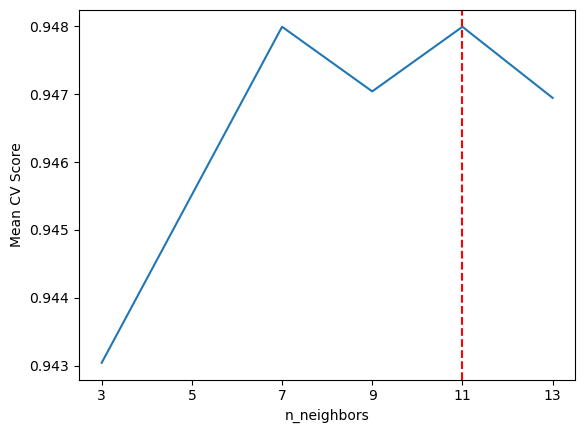

In [60]:
# Plots mean_test_scores vs. total neighbors
plt.plot(
    param,
    grid.cv_results_['mean_test_score'])

# Adds labels to the plot
plt.xticks(param)
plt.ylabel('Mean CV Score')
plt.xlabel('n_neighbors')

# Draws a vertical line where the best model is
plt.axvline(
    x=best_knn.n_neighbors, 
    color='red', 
    ls='--')

In [61]:
#Evaluating the model
#Predicting the Test set results
y_pred=best_knn.predict(X_test_s)
print(y_pred)

[0 1 1 ... 1 1 1]


In [62]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test, y_pred)
print('accuracy:%.4f\n\n'%(acc))
cm=metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matix:')
print(cm, '\n\n')
print ('--------------------------------------------')
result=metrics.classification_report(y_test,y_pred)
print('Classification Report:\n')
print(result)

accuracy:0.9431


Confusion Matix:
[[ 186  229]
 [  27 4058]] 


--------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.45      0.59       415
           1       0.95      0.99      0.97      4085

    accuracy                           0.94      4500
   macro avg       0.91      0.72      0.78      4500
weighted avg       0.94      0.94      0.93      4500



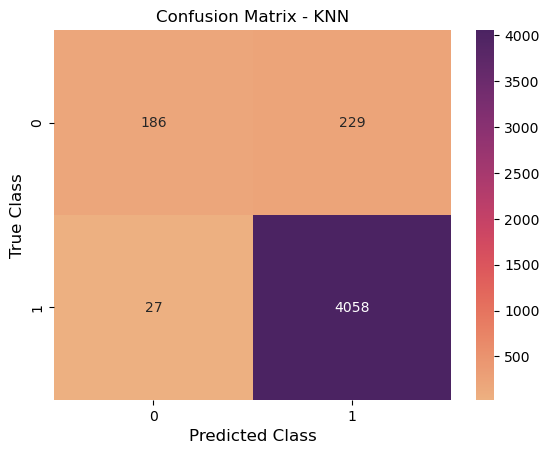

In [63]:
#use the seaborn heatmap to visualise the confusion matrix
ax = sns.heatmap(cm, cmap = 'flare', annot = True, fmt ='d')

plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.title("Confusion Matrix - KNN", fontsize=12)

plt.show()